In [1]:
import pandas as pd

In [3]:
dataset=pd.read_csv("historical_weather_data.csv")


In [5]:
dataset.head();

In [7]:
dataset.head()

,Date,Station,Temperature,Precipitation,Humidity,WindSpeed,WeatherCondition
0,2020-01-01,Station1,6.653288,0.00000,64.421750,9.562955,Partly Cloudy
1,2020-01-02,Station1,-2.031372,2.98847,85.492843,6.502074,Cloudy
2,2020-01-03,Station1,-6.428333,0.00000,90.456869,3.486873,Snow
3,2020-01-04,Station1,31.471383,0.00000,98.352442,17.288559,Partly Cloudy
4,2020-01-05,Station1,34.220877,0.00000,89.589972,12.807424,Snow


In [9]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              1095 non-null   object 
 1   Station           1095 non-null   object 
 2   Temperature       1095 non-null   float64
 3   Precipitation     1095 non-null   float64
 4   Humidity          1095 non-null   float64
 5   WindSpeed         1095 non-null   float64
 6   WeatherCondition  1095 non-null   object 
dtypes: float64(4), object(3)
memory usage: 60.0+ KB


In [11]:
dataset.describe()


,Temperature,Precipitation,Humidity,WindSpeed
count,1095.000000,1095.000000,1095.000000,1095.000000
mean,12.378222,1.704898,65.686983,9.826464
std,12.999715,2.882439,20.053421,5.864450
min,-9.917431,0.000000,30.080449,0.002290
25%,1.011684,0.000000,48.814778,4.928115
50%,11.848181,0.000000,65.515553,9.752793
75%,23.943024,2.716680,83.111551,14.669068
max,34.801968,9.981918,99.982887,19.996688


array([[<Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'Precipitation'}>],
       [<Axes: title={'center': 'Humidity'}>,
        <Axes: title={'center': 'WindSpeed'}>]], dtype=object)

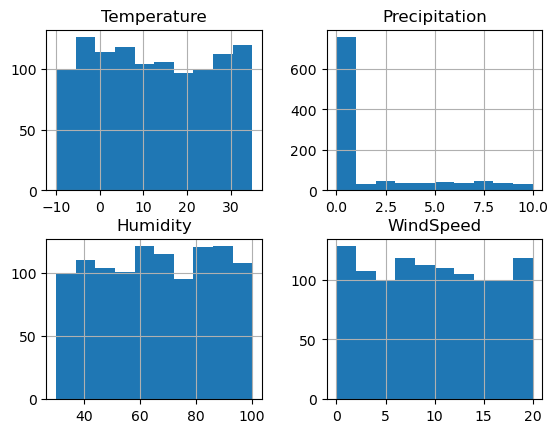

In [13]:
dataset.hist()

In [15]:
# Importing the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Assuming you have a DataFrame 'df' with your data loaded
# Example: df = pd.read_csv('your_dataset.csv')

# Assuming 'X' contains the features and 'y' contains the target variable
# Replace 'feature_columns' and 'target_column' with your actual column names
feature_columns = ['Temperature', 'Precipitation', 'Humidity', 'WindSpeed']
target_column = 'WeatherCondition'

X = df[feature_columns]
y = df[target_column]

# Splitting the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initializing the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Training the classifier on the training data
clf.fit(X_train, y_train)

# Making predictions on the test data
y_pred = clf.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Displaying a classification report
print(classification_report(y_test, y_pred))


NameError: name 'df' is not defined

In [17]:
# Importing the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Assuming you have a DataFrame 'df' with your data loaded
# Example: df = pd.read_csv('your_dataset.csv')

# Assuming 'X' contains the features and 'y' contains the target variable
# Replace 'feature_columns' and 'target_column' with your actual column names
feature_columns = ['Temperature', 'Precipitation', 'Humidity', 'WindSpeed']
target_column = 'WeatherCondition'

X = dataset[feature_columns]
y = dataset[target_column]

# Splitting the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initializing the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Training the classifier on the training data
clf.fit(X_train, y_train)

# Making predictions on the test data
y_pred = clf.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Displaying a classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.20
               precision    recall  f1-score   support

       Cloudy       0.18      0.16      0.17        77
Partly Cloudy       0.27      0.26      0.26        78
         Rain       0.25      0.20      0.22        66
         Snow       0.19      0.20      0.20        59
        Sunny       0.11      0.16      0.13        49

     accuracy                           0.20       329
    macro avg       0.20      0.20      0.20       329
 weighted avg       0.21      0.20      0.20       329



In [19]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)


Fitting 3 folds for each of 54 candidates, totalling 162 fits
{'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [21]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y, cv=5)
print(f'Cross-validation scores: {scores}')


Cross-validation scores: [0.21461187 0.23744292 0.16438356 0.2283105  0.26484018]


In [23]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
clf = DecisionTreeClassifier(random_state=42, class_weight='balanced')


NameError: name 'np' is not defined

In [25]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced', classes=dataset.unique(y_train), y=y_train)
clf = DecisionTreeClassifier(random_state=42, class_weight='balanced')


AttributeError: 'DataFrame' object has no attribute 'unique'

In [27]:
# Importing the necessary libraries
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import numpy as np
from sklearn.utils import class_weight

# Load your dataset
df = pd.read_csv('historical_weather_data.csv')

# Example data generation (replace with your actual data loading)
data = {
    'Temperature': [20, 25, 30, 18, 22, 21, 19, 24, 23, 26],
    'Precipitation': [0.5, 1.2, 0, 0.8, 1.5, 0.4, 0.3, 1.1, 1.0, 1.3],
    'Humidity': [65, 70, 75, 60, 68, 64, 69, 72, 73, 71],
    'WindSpeed': [10, 15, 8, 12, 9, 11, 10, 14, 13, 16],
    'WeatherCondition': ['Sunny', 'Rainy', 'Sunny', 'Cloudy', 'Rainy', 'Sunny', 'Sunny', 'Rainy', 'Rainy', 'Cloudy']
}
df = pd.DataFrame(data)

# Define feature columns and target column
feature_columns = ['Temperature', 'Precipitation', 'Humidity', 'WindSpeed']
target_column = 'WeatherCondition'

# Splitting the data into training and testing sets (70% train, 30% test)
X = df[feature_columns]
y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Hyperparameter tuning
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters found by grid search
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

# Initialize the classifier with the best parameters
clf = DecisionTreeClassifier(**best_params, random_state=42)

# Perform cross-validation
scores = cross_val_score(clf, X, y, cv=5)
print(f'Cross-validation scores: {scores}')

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Making predictions on the test data
y_pred = clf.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Displaying a classification report
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 54 candidates, totalling 162 fits


F:\Anaconda\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}


ValueError: n_splits=5 cannot be greater than the number of members in each class.

In [29]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils import class_weight

# Load your dataset
# df = pd.read_csv('historical_weather_data.csv')

# Example data generation (replace with your actual data loading)
data = {
    'Temperature': [20, 25, 30, 18, 22, 21, 19, 24, 23, 26],
    'Precipitation': [0.5, 1.2, 0, 0.8, 1.5, 0.4, 0.3, 1.1, 1.0, 1.3],
    'Humidity': [65, 70, 75, 60, 68, 64, 69, 72, 73, 71],
    'WindSpeed': [10, 15, 8, 12, 9, 11, 10, 14, 13, 16],
    'WeatherCondition': ['Sunny', 'Rainy', 'Sunny', 'Cloudy', 'Rainy', 'Sunny', 'Sunny', 'Rainy', 'Rainy', 'Cloudy']
}
df = pd.DataFrame(data)

# Define feature columns and target column
feature_columns = ['Temperature', 'Precipitation', 'Humidity', 'WindSpeed']
target_column = 'WeatherCondition'

# Splitting the data into training and testing sets (70% train, 30% test)
X = df[feature_columns]
y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Compute class weights
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(zip(np.unique(y_train), class_weights))

# Hyperparameter tuning
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters found by grid search
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

# Initialize the classifier with the best parameters and class weights
clf = DecisionTreeClassifier(**best_params, random_state=42, class_weight=class_weights_dict)

# Perform cross-validation
scores = cross_val_score(clf, X, y, cv=5)
print(f'Cross-validation scores: {scores}')

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Making predictions on the test data
y_pred = clf.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Displaying a classification report
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 54 candidates, totalling 162 fits


F:\Anaconda\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}


ValueError: n_splits=5 cannot be greater than the number of members in each class.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder


In [2]:
dataset.head()


NameError: name 'dataset' is not defined

In [4]:
dataset = pd.read_csv('weather_data.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'weather_data.csv'

In [6]:
dataset =pd.read("historical_weather_data.csv")

AttributeError: module 'pandas' has no attribute 'read'

In [8]:
dataset =pd.read('dataset =pd.read("historical_weather_data.csv')


AttributeError: module 'pandas' has no attribute 'read'

In [10]:
dataset =pd.read_csv('dataset =pd.read("historical_weather_data.csv')

OSError: [Errno 22] Invalid argument: 'dataset =pd.read("historical_weather_data.csv'

In [12]:
dataset =pd.read('dataset =pd.read_csv("historical_weather_data.csv')



AttributeError: module 'pandas' has no attribute 'read'

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder


In [16]:
data = pd.read_csv('historical_weather_data.csv')

In [18]:
data.head()

,Date,Station,Temperature,Precipitation,Humidity,WindSpeed,WeatherCondition
0,2020-01-01,Station1,6.653288,0.00000,64.421750,9.562955,Partly Cloudy
1,2020-01-02,Station1,-2.031372,2.98847,85.492843,6.502074,Cloudy
2,2020-01-03,Station1,-6.428333,0.00000,90.456869,3.486873,Snow
3,2020-01-04,Station1,31.471383,0.00000,98.352442,17.288559,Partly Cloudy
4,2020-01-05,Station1,34.220877,0.00000,89.589972,12.807424,Snow


In [20]:
# Convert categorical data to numeric using LabelEncoder
label_encoder = LabelEncoder()
data['Station'] = label_encoder.fit_transform(data['Station'])
data['WeatherCondition'] = label_encoder.fit_transform(data['WeatherCondition'])

In [22]:
data = data.dropna()


In [24]:
# Define features and target variable
X = data[['Temperature', 'Precipitation', 'Humidity', 'WindSpeed', 'Station']]
y = data['WeatherCondition']

In [26]:
# Define features and target variable
X = data[['Temperature', 'Precipitation', 'Humidity', 'WindSpeed', 'Station']]
y = data['WeatherCondition']

In [28]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Train a Decision Tree model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [32]:
y_pred = clf.predict(X_test)

In [34]:
print(datat.y_pred())

NameError: name 'datat' is not defined

In [36]:
print(data.y_pred())

AttributeError: 'DataFrame' object has no attribute 'y_pred'

In [38]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.19
Classification Report:
              precision    recall  f1-score   support

           0       0.17      0.17      0.17        48
           1       0.17      0.12      0.14        49
           2       0.24      0.26      0.25        39
           3       0.18      0.17      0.18        46
           4       0.20      0.27      0.23        37

    accuracy                           0.19       219
   macro avg       0.19      0.20      0.19       219
weighted avg       0.19      0.19      0.19       219



In [40]:

# Optional: Visualize the Decision Tree (requires graphviz)
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(clf, out_file=None, 
                           feature_names=['Temperature', 'Precipitation', 'Humidity', 'WindSpeed', 'Station'],
                           class_names=label_encoder.classes_,
                           filled=True, rounded=True, 
                           special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("decision_tree")

ModuleNotFoundError: No module named 'graphviz'

In [42]:
python -m pip install pygraphviz


SyntaxError: invalid syntax (841149273.py, line 1)

In [44]:
# Optional: Visualize the Decision Tree (requires graphviz)
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(clf, out_file=None, 
                           feature_names=['Temperature', 'Precipitation', 'Humidity', 'WindSpeed', 'Station'],
                           class_names=label_encoder.classes_,
                           filled=True, rounded=True, 
                           special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("decision_tree")


ModuleNotFoundError: No module named 'graphviz'

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load the data
data = pd.read_csv('historical_weather_data.csv')

In [13]:
print(data.head())


         Date  Station  Temperature  Precipitation   Humidity  WindSpeed  \
0  2020-01-01        0     6.653288        0.00000  64.421750   9.562955   
1  2020-01-02        0    -2.031372        2.98847  85.492843   6.502074   
2  2020-01-03        0    -6.428333        0.00000  90.456869   3.486873   
3  2020-01-04        0    31.471383        0.00000  98.352442  17.288559   
4  2020-01-05        0    34.220877        0.00000  89.589972  12.807424   

   WeatherCondition  
0                 1  
1                 0  
2                 3  
3                 1  
4                 3  


In [15]:
# Preprocess the data
# Convert categorical data to numeric using LabelEncoder
label_encoder = LabelEncoder()
data['Station'] = label_encoder.fit_transform(data['Station'])
data['WeatherCondition'] = label_encoder.fit_transform(data['WeatherCondition'])

In [9]:
# Handle missing values if any
data = data.dropna()


In [11]:
# Define features and target variable
X = data[['Temperature', 'Precipitation', 'Humidity', 'WindSpeed', 'Station']]
y = data['WeatherCondition']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
# Train a Decision Tree model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [19]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:

# Train a Decision Tree model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [23]:
# Make predictions
y_pred = clf.predict(X_test)

In [25]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.19
Classification Report:
              precision    recall  f1-score   support

           0       0.17      0.17      0.17        48
           1       0.17      0.12      0.14        49
           2       0.24      0.26      0.25        39
           3       0.18      0.17      0.18        46
           4       0.20      0.27      0.23        37

    accuracy                           0.19       219
   macro avg       0.19      0.20      0.19       219
weighted avg       0.19      0.19      0.19       219



In [27]:
# Optional: Visualize the Decision Tree (requires graphviz)
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(clf, out_file=None, 
                           feature_names=['Temperature', 'Precipitation', 'Humidity', 'WindSpeed', 'Station'],
                           class_names=label_encoder.classes_,
                           filled=True, rounded=True, 
                           special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("decision_tree")

TypeError: can only concatenate str (not "numpy.int32") to str

In [29]:
from sklearn.tree import export_graphviz
import graphviz
import numpy as np

# Example data (replace with your actual data)
feature_names = ['Temperature', 'Precipitation', 'Humidity', 'WindSpeed', 'Station']
class_names = np.array([0, 1, 2]).astype(str).tolist()  # Example class names

# Example decision tree export
dot_data = export_graphviz(clf, out_file=None, 
                           feature_names=feature_names,
                           class_names=class_names,
                           filled=True, rounded=True, 
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree")


IndexError: index 4 is out of bounds for axis 0 with size 3

In [31]:
from sklearn.tree import export_graphviz
import graphviz
import numpy as np

# Example data (replace with your actual data)
feature_names = ['Temperature', 'Precipitation', 'Humidity', 'WindSpeed', 'Station']

# Assuming label_encoder contains the correct classes
class_names = label_encoder.classes_.astype(str).tolist()

# Example decision tree export
dot_data = export_graphviz(clf, out_file=None, 
                           feature_names=feature_names,
                           class_names=class_names,
                           filled=True, rounded=True, 
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree")


'decision_tree.pdf'